### Step1: Prerequest Libraries

In [434]:
%%capture

# data management
! pip install -U pandas
! pip install -U numpy

# data visualization
! pip install -U matplotlib
! pip install -U plotnine

# modeling
! pip install -U scikit-learn

In [435]:
import pandas as pd
import sklearn
sklearn.__version__

'1.0.2'

In [436]:
# Helper packages
import numpy as np
import pandas as pd
import math
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle

# Modeling process
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import compose
from sklearn import cross_decomposition
from sklearn import decomposition
from sklearn import model_selection
from sklearn import linear_model
from sklearn import pipeline

---

### Step 2: Read Dataset
| Reading .CSV file from local directory |

In [437]:
H_data = pd.read_csv('/Users/awatefalshehri/Misk_DSI_2021/AA_ML_assignment/saudi_aqar_price_prediction/housing.csv')

# Initial dimensions
H_data.shape

H_data.head()

,Unnamed: 0,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,521,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,...,0,0,0,0,0,1,0,0,40000,درج داخلي للايجار التوالصل 0538143083
1,1653,جدة,حي بريمان,جنوب,350,0,7,5,2,1,...,1,0,0,0,1,1,1,0,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...
2,131,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,...,0,0,1,0,0,1,0,1,3300,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...
3,2284,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,...,1,0,1,0,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...
4,65,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,...,1,0,1,0,0,1,0,1,80000,الجزء الثالث والاخير للتصوير\n================...


---
### Step 3: Clean the data

In [438]:
def fixRent(details):
    details =  str(details)
    rent = "Unkown"
    if( details.find('شهري') != -1 or details.find('بالشهر') != -1):
        rent = 'Monthly'
    elif( details.find('يومي') != -1 or details.find('باليوم') != -1 ):
        rent = 'Daily'
    else:
        rent = 'Unkown'
        
    return rent

H_data.loc[:,'rent frequnetly'] = H_data.loc[:,'details'].apply(fixRent)

In [439]:
H_data.loc[:,['price',"details",'rent frequnetly']]

,price,details,rent frequnetly
0,40000,درج داخلي للايجار التوالصل 0538143083,Unkown
1,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...,Unkown
2,3300,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...,Monthly
3,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...,Unkown
4,80000,الجزء الثالث والاخير للتصوير\n================...,Unkown
...,...,...,...
2969,33000,دبلكس الاجار جديد ثلاثه ادوار الحي السابع كل ٦...,Unkown
2970,50000,فيلا دورين درج داخلي مجددة,Unkown
2971,37000,فلا للايجار فى الحي الخامس التاسع \nتتكون ثلاث...,Unkown
2972,35000,فيلا للإيجار على زاوية\nمطبخ راكب \n٤ غرف نوم ...,Monthly


In [440]:
H_data.groupby(['rent frequnetly']).size()

rent frequnetly
Daily         3
Monthly      54
Unkown     2917
dtype: int64

In [441]:
H_data[H_data['rent frequnetly'] == 'Daily']

,Unnamed: 0,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,...,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details,rent frequnetly
363,1100,جدة,حي الزمرد,شمال,350,0,4,4,1,1,...,1,1,0,0,1,0,0,3000,فيلا دورين مكونة من 4 غرف نوم و 4 دورات مياه و...,Daily
1279,1225,جدة,حي الشاطئ,غرب,350,2,3,4,2,1,...,1,1,0,1,1,0,0,2500,فيلا مؤثثه نظيفه جدا للايجار اليومي \nبالسعر ا...,Daily
2411,1192,جدة,حي الزمرد,جنوب,550,7,4,4,3,1,...,1,1,0,1,0,0,1,2000,فيلا للايجار اليومي بخصوصية تامه,Daily


---

### Step 4: Features of the data

In [442]:
# features
H_data.drop("details", axis=1).head()

,Unnamed: 0,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,rent frequnetly
0,521,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,...,0,0,0,0,0,1,0,0,40000,Unkown
1,1653,جدة,حي بريمان,جنوب,350,0,7,5,2,1,...,1,0,0,0,1,1,1,0,45000,Unkown
2,131,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,...,0,0,1,0,0,1,0,1,3300,Monthly
3,2284,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,...,1,0,1,0,0,1,0,0,36000,Unkown
4,65,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,...,1,0,1,0,0,1,0,1,80000,Unkown


In [443]:
H_data.drop("Unnamed: 0", axis=1).head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details,rent frequnetly
0,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,1,...,0,0,0,0,1,0,0,40000,درج داخلي للايجار التوالصل 0538143083,Unkown
1,جدة,حي بريمان,جنوب,350,0,7,5,2,1,1,...,0,0,0,1,1,1,0,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...,Unkown
2,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,1,...,0,1,0,0,1,0,1,3300,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...,Monthly
3,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,1,...,0,1,0,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...,Unkown
4,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,1,...,0,1,0,0,1,0,1,80000,الجزء الثالث والاخير للتصوير\n================...,Unkown


In [444]:
# Response variable
H_data["price"].head()

0    40000
1    45000
2     3300
3    36000
4    80000
Name: price, dtype: int64

---

### Step 5: Data splitting

In [445]:
# create train/test split
train, test = train_test_split(H_data, train_size=0.5, random_state=120)

# dimensions of training data
train.shape

(1487, 26)

In [446]:
y = H_data["pool"]
train_strat, test_strat = train_test_split(H_data, train_size=0.3, random_state=123, stratify=y)

In [447]:
# response distribution for raw data
H_data["price"].value_counts(normalize=True)

60000     0.088097
80000     0.083389
65000     0.065905
90000     0.053800
100000    0.051446
            ...   
330000    0.000336
420000    0.000336
38400     0.000336
2500      0.000336
66500     0.000336
Name: price, Length: 101, dtype: float64

In [448]:
# separate features from labels
X_train = train[["size"]]
y_train = train["price"]

# fit a KNN regression model with 10 neighbors
knn = KNeighborsRegressor(n_neighbors=10)
m1 = knn.fit(X_train, y_train)

m1

KNeighborsRegressor(n_neighbors=10)

In [449]:
m1.predict(X_train)

array([90000., 95500., 65000., ..., 63300., 80200., 71900.])

---
### Step 6: Evaluating models

In [450]:
pred = m1.predict(X_train)

# compute MSE
mse = mean_squared_error(y_train, pred)
mse

3556337885.524546

In [451]:
# compute RMSE
math.sqrt(mse)

59635.03907540051

### Classification model

In [452]:
# convert response to binary ints
train_strat["pool"].replace(('Yes', 'No'), (1, 0), inplace=True)

# separate features from labels
X_train_strat = train_strat[["pool"]]
y_train_strat = np.array(train_strat["pool"])

# fit a KNN regression model with 10 neighbors
knn2 = KNeighborsClassifier(n_neighbors=10)
m2 = knn2.fit(X_train_strat, y_train_strat)

# make predictions
pred = m2.predict_proba(X_train_strat)

# compute AUC
roc_auc_score(y_train_strat, pred[:, 1])

1.0

### Resampling

In [453]:
# define loss function
loss = 'neg_root_mean_squared_error'

# create 10 fold CV object
kfold = KFold(n_splits=10, random_state=125, shuffle=True)

# fit model with 10-fold CV
results = cross_val_score(m1, X_train, y_train, cv=kfold, scoring=loss)
results

array([-62816.55483289, -52363.67143265, -52022.10764562, -94865.79483511,
       -55647.67669282, -83476.98159196, -46498.74489718, -58214.87581552,
       -41388.88529357, -46007.78490236])

In [454]:
results.mean()

-59330.307793969034

In [455]:
# 10 fold cross validation repated 5 times (total of 50 folds)
rfk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=125)
results = cross_val_score(m1, X_train, y_train, cv=rfk, scoring=loss)
results

array([-62816.55483289, -52363.67143265, -52022.10764562, -94865.79483511,
       -55647.67669282, -83476.98159196, -46498.74489718, -58214.87581552,
       -41388.88529357, -46007.78490236, -51238.36703791, -68676.93556201,
       -73706.10963812, -55633.09651806, -71601.29699624, -71015.83163128,
       -41659.88932644, -56361.43838798, -58761.99281849, -63794.40167682,
       -51779.72449351, -70963.45934173, -43256.07758051, -49131.10550887,
       -73315.74800388, -91889.28106877, -51141.60817027, -86936.2068404 ,
       -38442.53178447, -39662.9348555 , -39498.61850443, -49469.30264343,
       -75549.24412207, -57750.76152495, -41043.3115336 , -74936.49968182,
       -68872.42384736, -42071.51477833, -95599.75497537, -41623.27886223,
       -36052.39737349, -64655.16733607, -64591.25460652, -44115.5314156 ,
       -68101.68915013, -37925.93332568, -76435.322973  , -61592.90091047,
       -49805.96477358, -94737.63758134])

In [456]:
# average RMSE across all 50 folds
results.mean()

-59733.99250200843

## Hyperparameter tuning

In [483]:
# basic model object
knn = KNeighborsRegressor()

# Create grid of hyperparameter values
hyper_grid = {'n_neighbors': range(2, 25)}

# Tune a knn model using grid search
grid_search = GridSearchCV(knn, hyper_grid, cv=kfold, scoring=loss)
results = grid_search.fit(X_train, y_train)

# Best model's cross validated RMSE
abs(results.best_score_)

58974.23690989074

In [484]:
# Best model's k value
results.best_estimator_.get_params().get('n_neighbors')

12

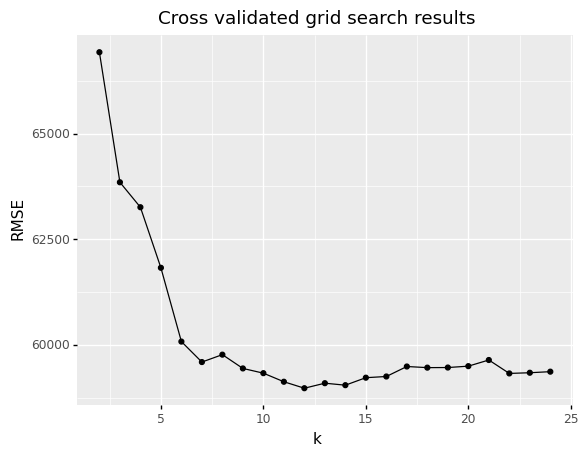

<ggplot: (8775421009655)>

In [486]:
# Plot all RMSE results
all_rmse = pd.DataFrame({'k': range(2, 25), 
                         'RMSE': np.abs(results.cv_results_['mean_test_score'])})

(ggplot(all_rmse, aes(x='k', y='RMSE'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))

## Putting the processes together

In [488]:
# create train/test split
train, test = train_test_split(H_data, train_size=0.6, random_state=125)

# separate features from labels and only use numeric features
X_train = train.select_dtypes(include='number').drop("price", axis=1)
y_train = train["price"]

# create KNN model object
knn = KNeighborsRegressor()

# define loss function
loss = 'neg_root_mean_squared_error'

# create 10 fold CV object
kfold = KFold(n_splits=10, random_state=125, shuffle=True)

# Create grid of hyperparameter values
hyper_grid = {'n_neighbors': range(2, 25)}

# Tune a knn model using grid search
grid_search = GridSearchCV(knn, hyper_grid, cv=kfold, scoring=loss)
results = grid_search.fit(X_train, y_train)

# Best model's cross validated RMSE
abs(results.best_score_)

64429.73541913981

In [489]:
# Best model's k value
results.best_estimator_.get_params().get('n_neighbors')

24

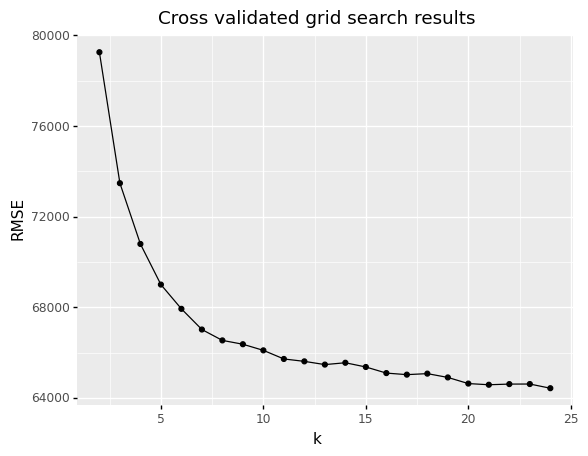

<ggplot: (8775421266679)>

In [492]:
# Plot all RMSE results
all_rmse = pd.DataFrame({'k': range(2, 25), 
                         'RMSE': np.abs(results.cv_results_['mean_test_score'])})

(ggplot(all_rmse, aes(x='k', y='RMSE'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))

In [493]:
# Saudi Aqar housing data
# ames = pd.read_csv("../data/housing.csv")

# create train/test split
train, test = train_test_split(H_data, train_size=0.7, random_state=123)

# separate features from labels and only use numeric features
X_train = train.drop("price", axis=1)
y_train = train[["price"]]

## Simple linear regression

In [494]:
# create linear regression model object
lm_mod = linear_model.LinearRegression()

# fit linear model with only pool feature
lm_fit = lm_mod.fit(X_train[["pool"]], y_train)

In [495]:
# intercept
lm_fit.intercept_

array([79154.85436893])

In [496]:
# coefficient for pool
lm_fit.coef_

array([[48839.08502501]])

### Interactions

In [498]:
# create linear regression model object
lm_mod = linear_model.LinearRegression()

# use PolynomialFeatures to create main pool and roof effects and
# also an interaction effect between pool & roof
effects = preprocessing.PolynomialFeatures(
  interaction_only=True,
  include_bias=False
  )
features = effects.fit_transform(X_train[["pool", "roof"]])

# fit linear model with only pool and roof feature and
# also include an interaction effect (pool:roof)
lm_fit = lm_mod.fit(features, y_train)

In [499]:
# coefficients for pool, roof effects and the interaction 
# effect between pool & roof
lm_fit.coef_

array([[27925.47245678, -5386.58466542, 45156.58466542]])

## Assessing model accuracy

In [500]:
# feature sets to compare across
feature_set1 = X_train[["pool"]]
feature_set2 = X_train[["pool", "roof"]]
#feature_set3 = X_train_encoded
feature_sets = {'lm1': feature_set1, 'lm2': feature_set2}

# define loss function
loss = 'neg_root_mean_squared_error'

# create 10 fold CV object
kfold = model_selection.KFold(n_splits=10, random_state=8451, shuffle=True)

# object to store CV RMSE results
results = {}

for name, feat in feature_sets.items():
  # create LM model object
  lm_mod = linear_model.LinearRegression()

  # execute and score the cross validation procedure
  cv_results = model_selection.cross_val_score(
    estimator=lm_mod, 
    X=feat, 
    y=y_train, 
    cv=kfold, 
    scoring=loss
    )
  results[name] = np.absolute(cv_results.mean())

In [501]:
results

{'lm1': 67179.93754598113, 'lm2': 67209.97272818911}